No of Support Vectors:  10
Support Vectors:
  [[-0.74104992 -0.17106644]
 [ 0.02030274  0.88057152]
 [-1.50240258 -1.64335959]
 [-0.89332045 -0.17106644]
 [-0.13196779  0.67024393]
 [ 0.7816554   0.67024393]
 [ 0.17257327 -0.17106644]
 [-0.89332045 -1.43303199]
 [-0.43650886 -0.80204922]
 [-0.13196779 -0.17106644]]
Accuracy Score:  1.0


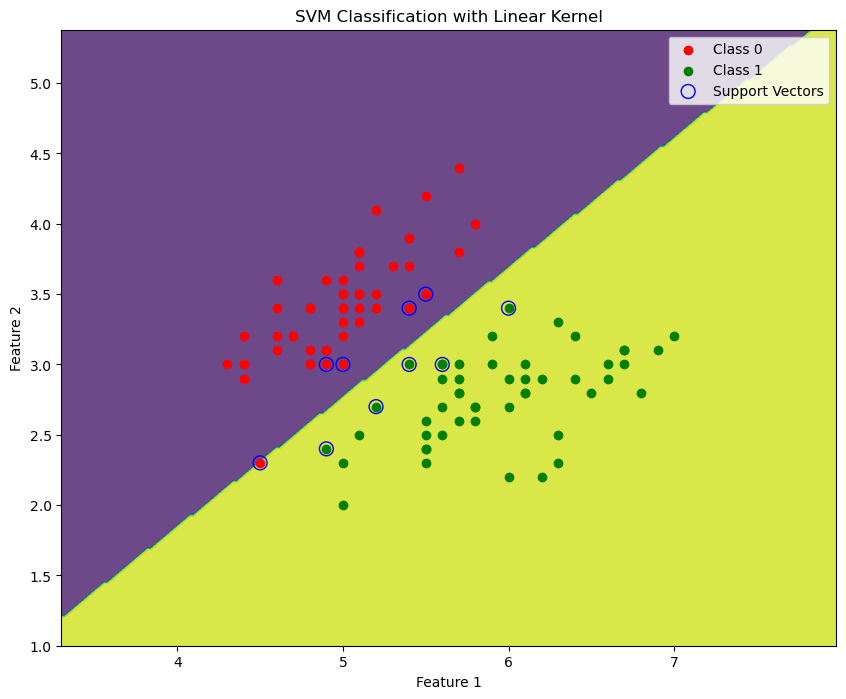

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

dataset=load_iris()
X=dataset.data[:,:2] #Class 0 and #Class 1 chances of error
y=dataset.target

X=X[y!=2] #chacnes of error
y=y[y!=2]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=SVC(kernel='linear')
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)



print(f"No of Support Vectors: ",len(model.support_vectors_))
print(f"Support Vectors:\n ", model.support_vectors_)
print(f"Accuracy Score: ",accuracy_score(y_test,y_pred))

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02)) #chances of error

grid_points=np.c_[xx.ravel(),yy.ravel()]
grid_points_scaled=scaler.transform(grid_points)
Z=model.predict(grid_points_scaled).reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.contourf(xx,yy,Z,alpha=0.8)
plt.scatter(X[y==0,0],X[y==0,1],color='red',label='Class 0')
plt.scatter(X[y==1,0],X[y==1,1,],color='green',label='Class 1')
sv_original=scaler.inverse_transform(model.support_vectors_)
plt.scatter(sv_original[:,0],sv_original[:,1],s=100,facecolors='none',edgecolors='blue',label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Linear Kernel')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load data and use only first 2 features for 2D visualization
dataset = load_iris()
X = dataset.data[:, :2]
y = dataset.target

# Keep only classes 0 and 1 (remove class 2)
mask = y != 2
X = X[mask]
y = y[mask]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print results
print(f"No of Support Vectors: ", len(model.support_vectors_))
print(f"Support Vectors:\n ", model.support_vectors_)
print(f"Accuracy Score: ", accuracy_score(y_test, y_pred))

# Create decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Make predictions on grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = model.predict(grid_points_scaled).reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='green', label='Class 1')

# Plot support vectors
sv_original = scaler.inverse_transform(model.support_vectors_)
plt.scatter(sv_original[:, 0], sv_original[:, 1], s=100, facecolors='none', 
           edgecolors='blue', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Linear Kernel')
plt.legend()
plt.show()